## 수익률 데이터 로드

In [51]:
import pandas as pd

### 포트폴리오 수익률 로드

In [52]:
import os

fnames = os.listdir('rtns')
fnames

['m1_2019_2021_prec_lr.csv',
 '.DS_Store',
 'm1_2019_2021_f1_xgb.csv',
 'm1_2019_2021_resampling_f1_xgb_over.csv',
 'm1_2019_2021_resampling_prec_rf_over.csv']

In [53]:
rtns = pd.read_csv('rtns/m1_2019_2021_resampling_f1_xgb_over.csv')
rtns['날짜'] = pd.to_datetime(rtns['날짜'])
rtns.set_index('날짜', inplace=True)
rtns

,year,sum,수익률
날짜,,,
2013-04-01,2012,953992,0.000000
2013-04-02,2012,944954,-0.009474
2013-04-03,2012,954216,0.009802
2013-04-04,2012,953188,-0.001077
2013-04-05,2012,951270,-0.002012
...,...,...,...
2023-03-27,2021,236029,-0.004761
2023-03-28,2021,249218,0.055879
2023-03-29,2021,249847,0.002524


In [54]:
rtns_2020 = rtns[rtns['year']==2020]
rtns_2020

,year,sum,수익률
날짜,,,
2021-04-01,2020,1481368,0.000000
2021-04-02,2020,1489370,0.005402
2021-04-05,2020,1505412,0.010771
2021-04-06,2020,1516347,0.007264
2021-04-07,2020,1526629,0.006781
...,...,...,...
2022-03-25,2020,1688065,-0.003459
2022-03-28,2020,1672390,-0.009286
2022-03-29,2020,1684986,0.007532


In [55]:
rtns_2021 = rtns[rtns['year']==2021]

print(rtns_2021['수익률'].cumprod())
rtns_2021

날짜
2022-04-01    0.0
2022-04-04    0.0
2022-04-05    0.0
2022-04-06   -0.0
2022-04-07    0.0
             ... 
2023-03-27    0.0
2023-03-28    0.0
2023-03-29    0.0
2023-03-30    0.0
2023-03-31   -0.0
Name: 수익률, Length: 249, dtype: float64


,year,sum,수익률
날짜,,,
2022-04-01,2021,264063,0.000000
2022-04-04,2021,266216,0.008153
2022-04-05,2021,269678,0.013004
2022-04-06,2021,266420,-0.012081
2022-04-07,2021,259422,-0.026267
...,...,...,...
2023-03-27,2021,236029,-0.004761
2023-03-28,2021,249218,0.055879
2023-03-29,2021,249847,0.002524


In [ ]:
# for ticker in best_portfolio_2021.index:
#     # print(ticker)
#     price = stock.get_market_ohlcv(f'{year+1}0401', f'{year+2}0331', ticker=ticker)
#     best_portfolio_2021.loc[ticker, '매수가'] = price['종가'][0]
#     best_portfolio_2021.loc[ticker, '매도가'] = price['종가'][-1]
    
# best_portfolio_2021.loc['total', '매수가'] = best_portfolio_2021['매수가'].sum()
# best_portfolio_2021.loc['total', '매도가'] = best_portfolio_2021['매도가'].sum()
# best_portfolio_2021['개별수익률(%)'] = (best_portfolio_2021['매도가']-best_portfolio_2021['매수가'])/best_portfolio_2021['매수가'] * 100
# best_portfolio_2021 = best_portfolio_2021.sort_values('개별수익률(%)', ascending=False)

In [ ]:
# best_portfolio_2021.reset_index(drop=False)[['회계년도', '회사명', '거래소코드', '매수가', '매도가', '개별수익률(%)']]

In [ ]:
# portfolios = pd.DataFrame()

# for fname in fnames:
#     if not fname.endswith('.csv'): continue
#     print(fname)
#     # break
#     portfolio = pd.read_csv('rtns/'+fname)[['날짜', '수익률']]
#     portfolio.rename(columns={'수익률':fname.replace('.csv', '')}, inplace=True)
#     portfolio.set_index('날짜', inplace=True)
#     portfolio.index = pd.to_datetime(portfolio.index)
    
#     portfolios = pd.merge(
#         portfolios, portfolio,
#         left_index=True, right_index=True,
#         how='outer'
#     )

# portfolios.sort_index(inplace=True)
# print(portfolios.shape)
# portfolios.head()

In [ ]:
# portfolios.index.year.value_counts().sort_index()

In [ ]:
# portfolios.shape

### 벤치마크 수익률 로드

In [57]:
benchmark = pd.read_csv('benchmark/rtns_benchmark.csv', index_col=0)
benchmark.index = pd.to_datetime(benchmark.index)
benchmark

,kospi,kosdaq,S&P500
2013-04-01,0.000000,0.000000,0.000000
2013-04-02,-0.004930,-0.002058,0.005172
2013-04-03,-0.001475,0.009280,-0.010546
2013-04-04,-0.011986,-0.004893,0.004048
2013-04-05,-0.016443,-0.013904,-0.004295
...,...,...,...
2023-03-27,-0.002377,0.004344,0.001647
2023-03-28,0.010676,0.007032,-0.001574
2023-03-29,0.003688,0.012513,0.014237
2023-03-30,0.003781,0.007749,0.005715


In [58]:
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2595 entries, 2013-04-01 to 2023-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kospi   2595 non-null   float64
 1   kosdaq  2595 non-null   float64
 2   S&P500  2595 non-null   float64
dtypes: float64(3)
memory usage: 81.1 KB


In [59]:
benchmark.index.year.value_counts().sort_index()

2013    196
2014    259
2015    258
2016    260
2017    259
2018    259
2019    259
2020    260
2021    260
2022    260
2023     65
Name: count, dtype: int64

## 벤치마크와 비교

In [60]:
# """ 백테스팅 """

# # !pip install quantstats

# import quantstats as qs

# # index : 시계열
# # value : 수익률

# # rtns_pf : 포트폴리오 수익률 데이터
# # rtns_benchmark : 벤치마크 수익률 데이터

# qs.reports.full(rtns_pf, rtns_benchmark)

In [61]:
import quantstats as qs

In [ ]:
# methods = [fname.replace('.csv', '') for fname in fnames if fname.endswith('.csv')]
# methods

In [ ]:
# 0~3

# # m1_2019_2021_f1_xgb -> 좋음 (vs kosdaq)
# method = methods[1]

# # m1_2019_2021_resampling_f1_xgb_over
# # -> sampling 하기 전보다 수익률은 낮은데 kosdaq 보단 좋음(mdd 약간 증가)
# method = methods[2]

# m1_2019_2021_resampling_prec_rf_over
# -> xgb SAMPLING이랑 비슷


# method = methods[3]

In [75]:
# method_benchmark = 'kospi'
method_benchmark = 'kosdaq'
# method_benchmark = 'S&P500'

In [76]:
# rtns_pf = rtns_2020['수익률']
rtns_pf = rtns_2021['수익률']
rtns_benchmark = benchmark.loc[rtns_pf.index, method_benchmark]

rtns_pf.shape, rtns_benchmark.shape

((249,), (249,))

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2022-04-04   2022-04-04
End Period                 2023-03-31   2023-03-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          -9.89%       -5.14%
CAGR﹪                     -7.01%       -3.61%

Sharpe                     -0.29        -0.03
Prob. Sharpe Ratio         38.59%       48.78%
Smart Sharpe               -0.27        -0.03
Sortino                    -0.39        -0.04
Smart Sortino              -0.36        -0.04
Sortino/√2                 -0.28        -0.03
Smart Sortino/√2           -0.25        -0.03
Omega                      0.99         0.99

Max Drawdown               -31.59%      -31.79%
Longest DD Days            360          360
Volatility (ann.)          25.28%       29.74%
R^2                        0.71         0.71
Information Ratio          0.03         0.03
Calmar       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a s

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-04-06,2022-10-13,2023-03-31,360,-31.786427,-29.742879


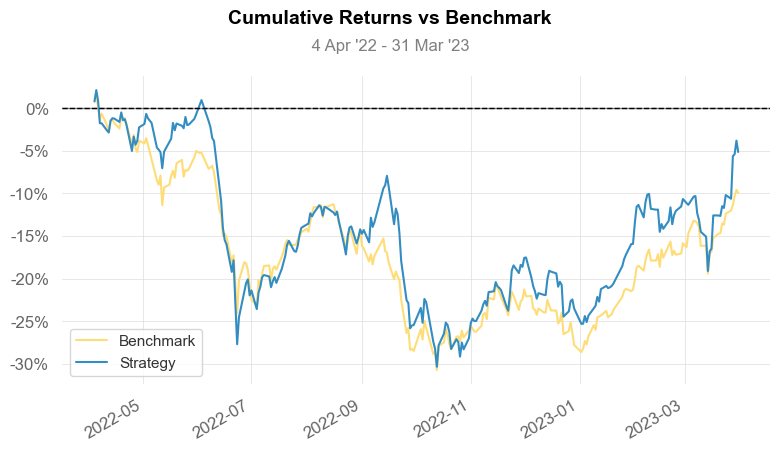

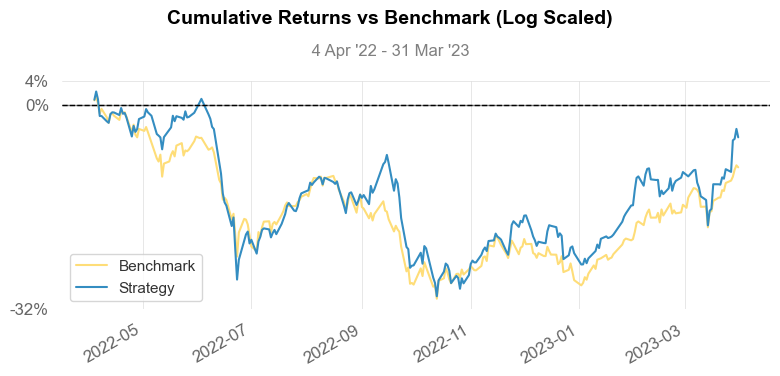

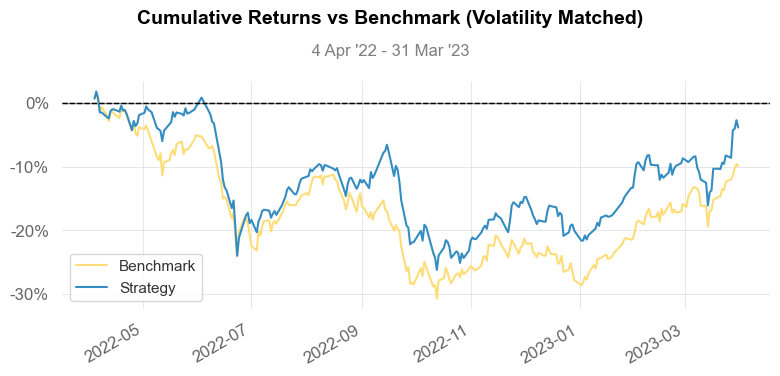

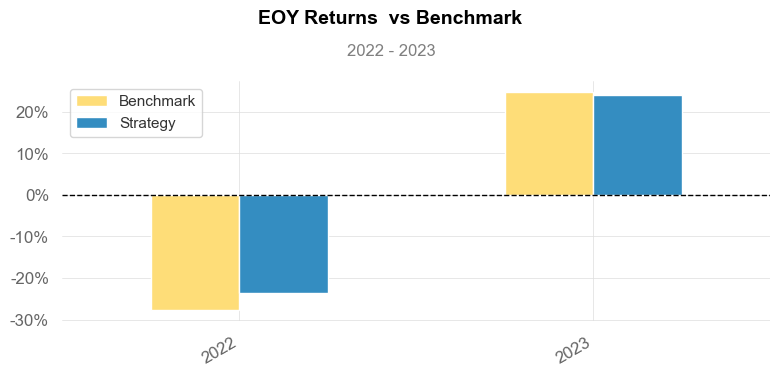

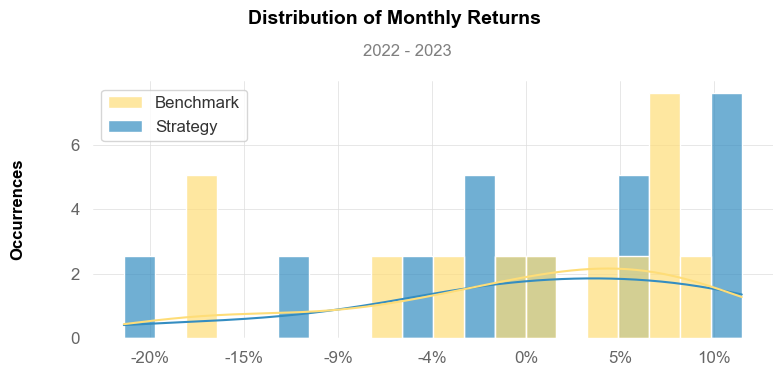

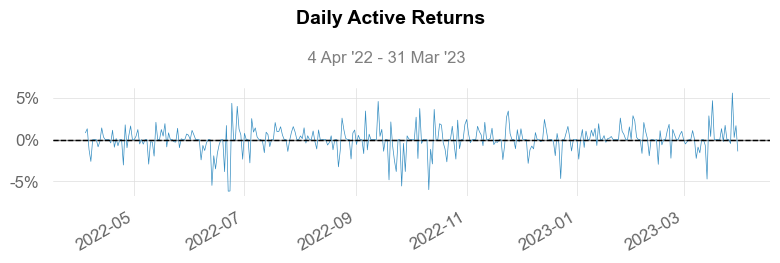

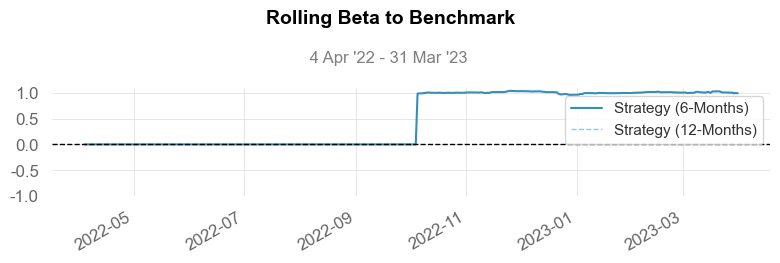

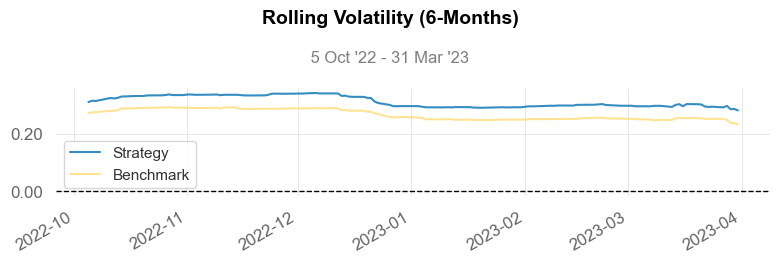

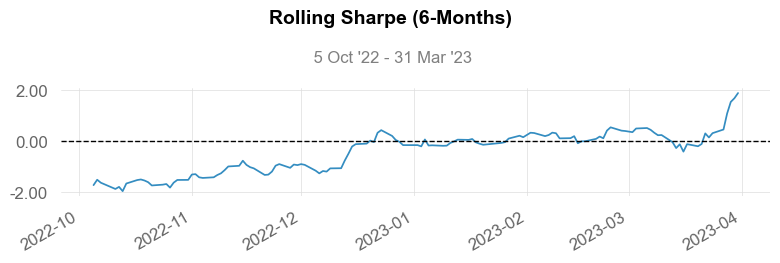

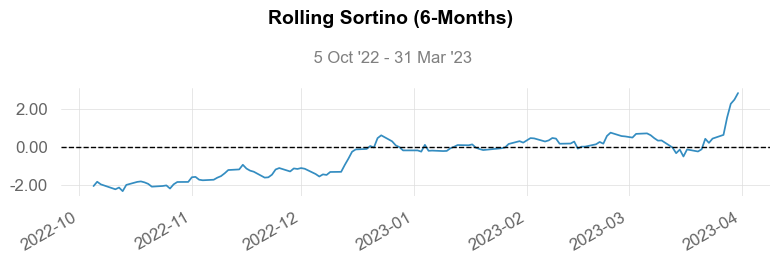

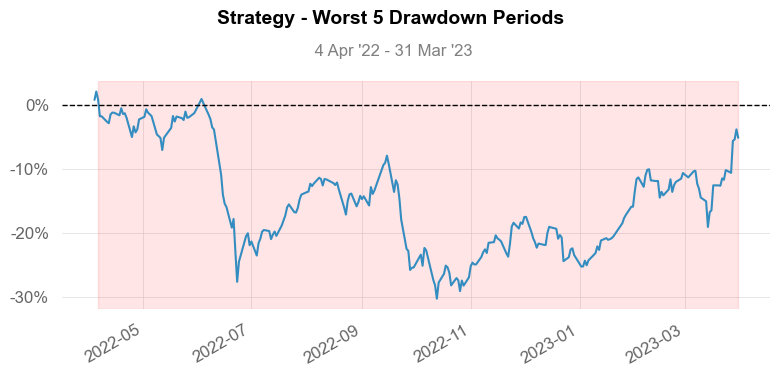

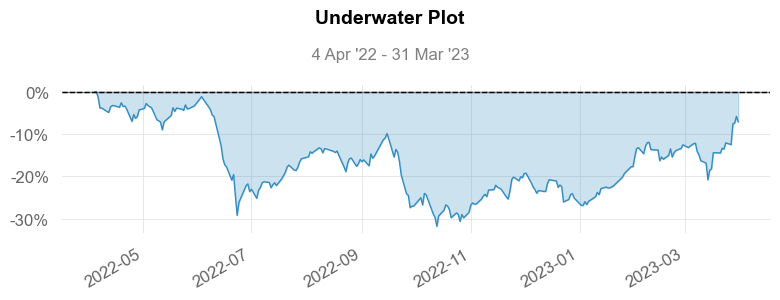

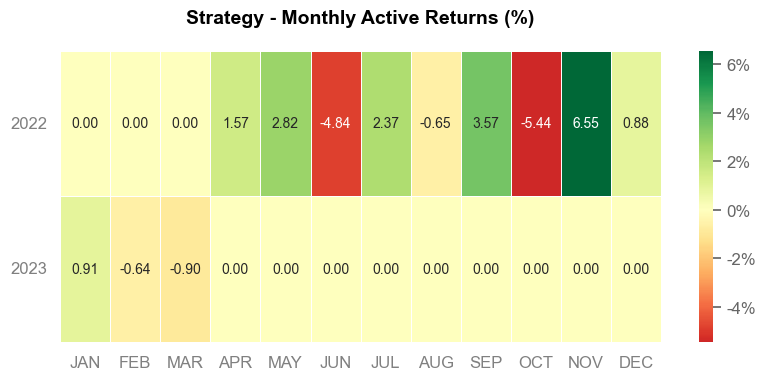

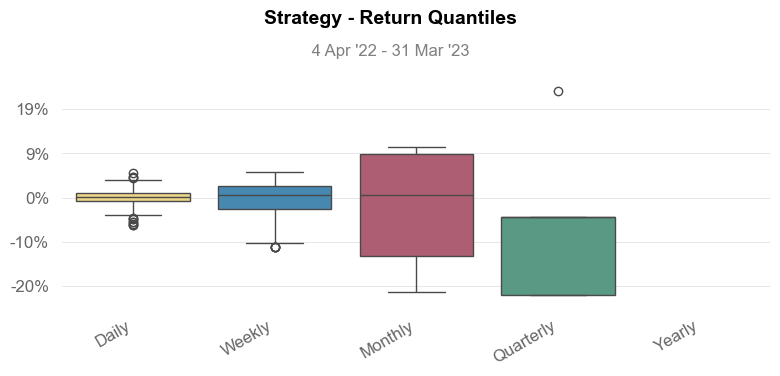

In [77]:
# print(f'{method_benchmark} vs {method}')
qs.reports.full(rtns_pf, rtns_benchmark)